In [124]:
import string
import re
import nltk
from nltk import word_tokenize
from collections import Counter
import lyricwikia

print( lyricwikia.get_lyrics('Justin Bieber', 'Baby'))
def get_tokens():
    text = lyricwikia.get_lyrics('Justin Bieber', 'Baby')
    lowers = text.lower()
    #remove the punctuation using the character deletion step of translate
    #no_punctuation = lowers.translate(None,string.punctuation)
    #remove the enter/spaces 
    translation = str.maketrans("", "", string.punctuation)
    no_enter =  re.sub(r"\\n"," ", lowers)
    no_punctuation = lowers.translate(translation)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

Justin Bieber
Oh whoa
Oh whoa
Oh whoa

You know you love me, I know you care
Just shout whenever, and I'll be there
You are my love, you are my heart
And we would never ever ever be apart

Are we an item? Girl, quit playing
We're just friends, what are you saying?
Say there's another and look right in my eyes
My first love broke my heart for the first time
And I was like...

Baby, baby, baby ooh
Like baby, baby, baby no
Like baby, baby, baby ooh
I thought you'd always be mine (mine)

Baby, baby, baby ooh
Like baby, baby, baby no
Like baby, baby, baby ooh
I thought you'd always be mine (mine)

Oh, for you I would have done whatever
And I just can't believe we ain't together
And I wanna play it cool, but I'm losin' you
I'll buy you anything, I'll buy you any ring
And I'm in pieces, baby fix me
And just shake me 'til you wake me from this bad dream
I'm going down, down, down, down
And I just can't believe my first love won't be around

And I'm like
Baby, baby, baby ooh
Like baby, baby, ba

In [125]:
#tokens = get_tokens()
#count = Counter(tokens)
#print(count.most_common(10))

In [126]:
from nltk.corpus import stopwords

#tokens = get_tokens()
#filtered = [w for w in tokens if not w in stopwords.words('english')]
#count = Counter(filtered)
#print(count.most_common(100))


In [127]:
#tagged = nltk.pos_tag(tokens)
#print(tagged)

In [128]:
from nltk.stem.porter import *

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#stemmer = PorterStemmer()
#stemmed = stem_tokens(filtered, stemmer)
#count = Counter(stemmed)
#print (count.most_common(100))

In [129]:
from nltk.corpus import wordnet

#get and weigh in the tagged words


In [130]:
# Get audio analysis from spotify and put it into an array
Songs  = [] 

In [5]:
import anew
import os
import itertools

#with open("C:/Users/Cedezmarie/Desktop/Thesis/Song-Lyrics/Kim Jonghyun/Lonely.txt", 'r') as f:
  #  content = f.readlines()
list_of_musicians  = os.listdir(r'C:\Users\Cedezmarie\Desktop\Thesis\Song-Lyrics')
print(list_of_musicians)
arr = os.listdir(r'C:\Users\Cedezmarie\Desktop\Thesis\Song-Lyrics\Kim Jonghyun')
content = []
for i in range(len(arr)):
    with open(str("C:/Users/Cedezmarie/Desktop/Thesis/Song-Lyrics/Kim Jonghyun/" + arr[i]), 'r') as f:
            content.append(f.readlines())
        
content = [y for x in content for y in x]

import csv
#print(content)
with open('sentiment.csv', 'w') as csvfile:
    sentiment_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    sentiment_writer.writerow(["Valence", "Arousal"])
    
    for line in content:
        line = line.replace(',','')
        line = line.rstrip()
        if line.strip():
            line_to_word = line.split(" ")
            sentiment_attributes = anew.sentiment(line_to_word)
            sentiment_writer.writerow([sentiment_attributes['valence'], sentiment_attributes['arousal']])

['Albert Ayler', 'Amy Farris', 'Anders Göthberg', 'Antoine Trial', 'Antonio Flores', 'artists.txt', 'B. B. Gabor', 'Billy Mackenzie', 'Bob Birch', 'Bob Brozman', 'Bob Lynch (musician)', 'Bored Nothing', 'Bruce Waibel', 'Butch Trucks', 'Capital Steez', 'Chet Allen', 'Chris Cornell', 'Cliff Davies (musician)', 'createF.class', 'createF.java', 'Cândida Branca Flor', 'Daniel E. Kelley', 'Danny Gatton', 'Dave Rubinstein', 'Dave Schulthise', 'Debbie Weems', 'Del Shannon', 'Derrick Plourde', 'Dickie Goodman', 'Donny Hathaway', 'Doug Hopkins', 'Dédé Fortin', 'Ephraim Lewis', 'Erik Brodeskift', 'Evan McCaskey', 'Ezkimo', 'Fred Barnes', 'Giuseppe Gallignani', 'Guru Josh', 'Herman Brood', 'Hide (musician)', 'Ian Morris (musician)', 'Igor Sorin', 'Ingo Schwichtenberg', 'Jack Little (songwriter)', 'James Freud', 'James Royce Shannon', 'Jason Thirsk', 'Jean Adebambo', 'Jean-Michel Basquiat', 'Jeff Ward (musician)', 'Jim Ellison', 'Joe Maini', 'Joel Rundell', 'John Herald', 'John Spence (musician)', 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lyrics = pd.read_csv('sentiment.csv')
X_lyrics = lyrics[['Valence','Arousal']].as_matrix()

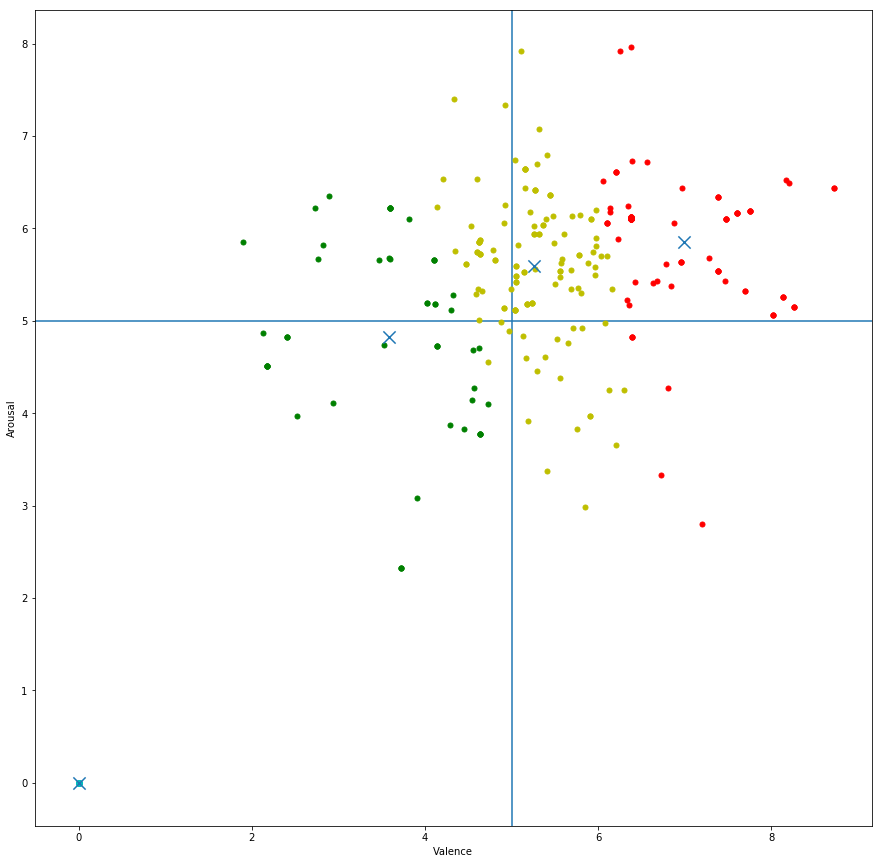

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_lyrics)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y."]
plt.figure(figsize=(15,15))
plt.axvline(x=5)
plt.axhline(y=5)
for i in range(len(X_lyrics)):
    plt.plot(X_lyrics[i][0], X_lyrics[i][1],colors[int(labels[i])], markersize =10)

plt.xlabel("Valence")
plt.ylabel("Arousal")
#plt.grid(linestyle='-', linewidth=1)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)
plt.show()